# Fundamentals of statistics

1. population - set of all individuals relevant to a particular statistical question
2. sample - a samll group from a population
3. sampling - selecting smaller group from a population
4. sampling error - the difference between the metrics of population and samples
5. parameter - metrics specific to a population
6. statistic - metrics specific to a sample

     ### sampling error = parameter - statistic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
wnba = pd.read_csv('/users/username/desktop/data/WNBA Stats.csv')

In [4]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [5]:
wnba.shape

(143, 32)

In [6]:
parameter = wnba['Games Played'].max()
parameter

32

In [7]:
sample = wnba['Games Played'].sample(random_state=1)
sample

78    30
Name: Games Played, dtype: int64

In [8]:
statistic = sample.max()
statistic

30

In [9]:
sampling_error = parameter - statistic
sampling_error

2

## Simple Random Sampling

In statistical terms, we want our samples to be **representative** of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

One way to perform random sampling is to generate random numbers and use them to select a few sample units from the population. In statistics, this sampling method is called **simple random sampling**, and it's often abbreviated as **SRS**

When we use the random_state parameter, like we did in the previous exercise with **Series.sample(30, random_state = 1)**, we make the generation of random numbers **predictable**. This is because **Series.sample()** uses a pseudorandom number generator under the hood. A pseudorandom number generator uses an initial value to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. With random_state we specify that initial value used by the pseudorandom number generator.

If we want to generate a sequence of five numbers using a pseudorandom generator, and begin from an initial value of 1, we'll get the same five numbers no matter how many times we run the code. If we ran **wnba['Games Played'].sample(5, random_state = 1)** we'd get the same sample every time we run the code.

In [10]:
wnba['Games Played'].sample(5, random_state=1)

78     30
116    29
31     26
5      14
125    28
Name: Games Played, dtype: int64

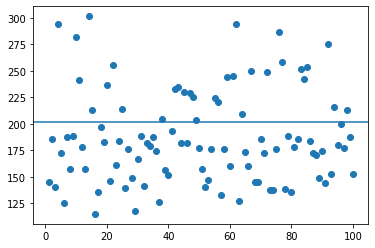

In [11]:
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())
    
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)

We can easily see how sample means tend to vary less and less around the population mean as we increase the sample size. From this observation we can make two conclusions:

* Simple random sampling is not a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.
* When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which in turn decreases the chances that we'll get an unrepresentative sample.

## Stratified sampling

* To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups, and then do simple random sampling for every group. We can group our data set by player position, and then sample randomly from each group.

* This sampling method is called **stratified sampling**, and each stratified group is also known as a **stratum**.

In [12]:
wnba['Points per game'] = wnba['PTS'] / wnba['Games Played']

wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

In [13]:
stratum_F = wnba[wnba.Pos == 'F']
stratum_G = wnba[wnba.Pos == 'G']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}

for stratum, position in [(stratum_F,'F'), (stratum_G,'G'), (stratum_C,'C'), (stratum_GF,'G/F'), (stratum_FC,'F/C')]:
    sample = stratum['Points per game'].sample(10, random_state=0)
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key=points_per_position.get)

In [14]:
points_per_position

{'F': 8.702175158545568,
 'G': 7.092926195632343,
 'C': 9.833761394334251,
 'G/F': 6.817264935760487,
 'F/C': 9.059118773946361}

* When we describe a sample or a population (by measuring averages, proportions, and other metrics; by visualizing properties of the data through graphs; etc.), we do **descriptive statistics**.
* When we try to use a sample to draw conclusions about a population, we do **inferential statistics** (we infer information from the sample about the population).

## Variables in statistics

* Generally, a variable that describes how much there is of something describes a quantity, and, for this reason, it's called a **quantitative variable**.
*  Variables that describe qualities are called **qualitative variables** or categorical variables. Generally, qualitative variables describe what or how something is.

The Team and Height variables provide different amounts of information because they have a different nature (one is qualitative, the other quantitative), and because they are measured differently

The system of rules that define how each variable is measured is called **scale of measurement** or, less often, **level of measurement**.

In the next screens, we'll learn about a system of measurement made up of four different scales of measurement: **nominal, ordinal, interval, and ratio**. As we'll see, the characteristics of each scale pivot around three main questions:

## Frequency

One way to simplify this data set is to select a variable, count how many times each unique value occurs, and represent the **frequencies** (the number of times a unique value occurs) in a table. This is how such a table looks for the POS (player position) variable:

In [15]:
wnba['Pos'].value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

Because the table above shows how frequencies are distributed, it's often called a **frequency distribution table**, or, shorter, **frequency table** or **frequency distribution**. Throughout this mission, our focus will be on learning the details behind this form of simplifying data.

In [16]:
wnba.shape

(143, 33)

In [17]:
height = wnba['Height'].value_counts()
height

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

In [18]:
height.sort_index(ascending=False)

206     1
201     2
198     5
196     9
193    18
191    11
188    20
185    15
183    11
180     7
178     8
175    16
173    11
170     6
168     2
165     1
Name: Height, dtype: int64

In [19]:
age_ascending = wnba['Age'].value_counts().sort_index()
age_ascending

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

In [20]:
age_descending = wnba['Age'].value_counts().sort_index(ascending=False)
age_descending

36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

In [21]:
wnba[['Name', 'PTS']].head()

,Name,PTS
0,Aerial Powers,93
1,Alana Beard,217
2,Alex Bentley,218
3,Alex Montgomery,188
4,Alexis Jones,50


In [22]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

In [23]:
wnba['PTS_ordinal_scale'].value_counts().iloc[[5,1,2,0,3,4]]

very few points             12
few points                  27
many, but below average     25
average number of points    45
more than average           21
much more than average      13
Name: PTS_ordinal_scale, dtype: int64

### Proportion

In [24]:
wnba['Pos'].value_counts()/len(wnba) # or just

wnba['Pos'].value_counts(normalize=True)

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64

### Percentage

In [25]:
wnba['Pos'].value_counts(normalize=True)*100

G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64

Because proportions and percentages are relative to the total number of instances in some set of data, they are called **relative frequencies**. In contrast, the frequencies we've been working with so far are called **absolute frequencies** because they are absolute counts and don't relate to the total number of instances.

In [26]:
perc = wnba['Age'].value_counts(normalize=True).sort_index()*100
perc

21     1.398601
22     6.993007
23    10.489510
24    11.188811
25    10.489510
26     8.391608
27     9.090909
28     9.790210
29     5.594406
30     6.293706
31     5.594406
32     5.594406
33     2.097902
34     3.496503
35     2.797203
36     0.699301
Name: Age, dtype: float64

In [27]:
perc_25 = perc[25] / 100
perc_25

0.1048951048951049

In [28]:
perc_over_30 = perc.loc[30:].sum()
perc_over_30

26.573426573426573

In [29]:
perc_below_23 = perc.loc[:23].sum()
perc_below_23

18.88111888111888

In this context, the value of 23 is called the 19th **percentile**. If a value is the 19th percentile, it means that 19% of all the values in the distribution are equal to or less than. We can arrive at the same answer a bit faster using the **percentileofscore(a, score, kind='weak')** function from **scipy.stats**:

In [30]:
from scipy.stats import percentileofscore
print(percentileofscore(a = wnba['Age'], score = 23, kind = 'weak'))

18.88111888111888


In [31]:
percentile_rank_half_less = int(percentileofscore(wnba['Games Played'], 17, 'weak'))
percentile_rank_half_less

16

In [32]:
percentage_half_more = 100 - percentileofscore(wnba['Games Played'], 17, 'weak')
percentage_half_more

83.91608391608392

To find percentiles, we can use the **Series.describe()** method, which returns by default the 25th, the 50th, and the 75th percentiles:

In [33]:
wnba['Age'].describe()

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

In [34]:
wnba['Age'].describe().iloc[3:]

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64

The three percentiles that divide the distribution in four equal parts are also known as **quartiles** (from the Latin quartus which means four). There are three quartiles in the distribution of the Age variable:

* The first quartile (also called lower quartile) is 24 (note that 24 is also the 25th percentile).
* The second quartile (also called the middle quartile) is 27 (note that 27 is also the 50th percentile).
* And the third quartile (also called the upper quartile) is 30 (note that 30 is also the 75th percentile).

In [35]:
wnba['Age'].describe(percentiles = [.1, .15, .33, .5, .592, .85, .9]).iloc[3:]

min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64

In [36]:
wnba['Age'].describe(percentiles=[.5, .75, .95]) # upper quratile = 30, middle quartile = 27, 95th percentile = 34

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
50%       27.000000
75%       30.000000
95%       34.000000
max       36.000000
Name: Age, dtype: float64

There's a lot of granularity in the table above, but for this reason it's not easy to find patterns. The table for the Weight variable is a relatively happy case - the frequency tables for variables like PTS, BMI, or MIN are even more daunting.

Fortunately, pandas can handle this process gracefully. We only need to make use of the **bins** parameter of **Series.value_counts()**. We want ten equal intervals, so we need to specify **bins = 10**:

In [37]:
wnba['Weight'].value_counts(bins=10).sort_index()

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: Weight, dtype: int64

Because we group values in a table to get a better sense of frequencies in the distribution, the table we generated above is also known as a **grouped frequency distribution table**. Each group (interval) in a grouped frequency distribution table is also known as a **class interval**. (107.2, 113.0], for instance, is a class interval.

Examine the frequency table for the PTS (total points) variable trying to find some patterns in the distribution of values. Then, generate a grouped frequency distribution table for the PTS variable with the following characteristics:
* The table has 10 class intervals.
* For each class interval, the table shows percentages instead of frequencies.
* The class intervals are sorted in descending order.

In [38]:
group_freq_table = wnba['PTS'].value_counts(bins=10, normalize=True).sort_index(ascending=False)*100
group_freq_table

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64

In [39]:
wnba['MIN'].value_counts(bins=5, normalize=True)

(213.2, 414.4]     0.223776
(615.6, 816.8]     0.202797
(10.993, 213.2]    0.202797
(816.8, 1018.0]    0.195804
(414.4, 615.6]     0.174825
Name: MIN, dtype: float64

## Decimal intervals

In [40]:
intervals = pd.interval_range(start = 0, end = 600, freq = 100)
print(intervals)

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')


In [41]:
gr_freq_table = pd.Series([0,0,0,0,0,0], index = intervals)
print(gr_freq_table)

(0, 100]      0
(100, 200]    0
(200, 300]    0
(300, 400]    0
(400, 500]    0
(500, 600]    0
dtype: int64


In [42]:
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break
print(gr_freq_table)

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64


# Visualization
In this mission, we learned about the graphs we can use to visualize the distributions of various kinds of variables. If a variable is measured on a nominal or ordinal scale, we can use a bar plot or a pie chart. If the variable is measured on an interval or ratio scale, then a histogram is good choice.

In [43]:
viz = pd.DataFrame(columns=['Scale', 'Graph'])
viz['Scale'] = ['Nominal', 'Ordinal', 'Interval', 'Ratio']
viz['Graph'] = ['Bar plot & Pie chart','Bar plot & Pie chart','Histogram','Histogram']
viz

,Scale,Graph
0,Nominal,Bar plot & Pie chart
1,Ordinal,Bar plot & Pie chart
2,Interval,Histogram
3,Ratio,Histogram


## Vertical bar plot

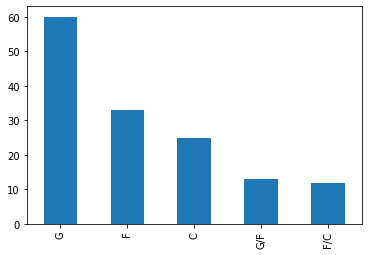

In [44]:
wnba['Pos'].value_counts().plot.bar() # Vertical bar plot

## Horizontal bar plot

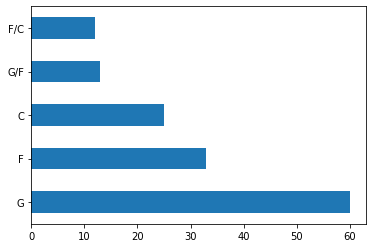

In [45]:
wnba['Pos'].value_counts().plot.barh() # Horizontal bar plot

### Rotate label name

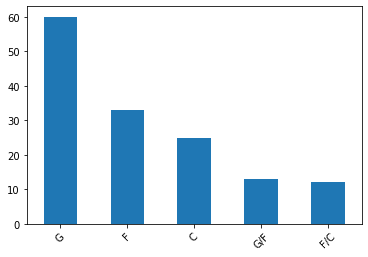

In [46]:
wnba['Pos'].value_counts().plot.bar(rot=45) # Rotate label ticks

### Add title

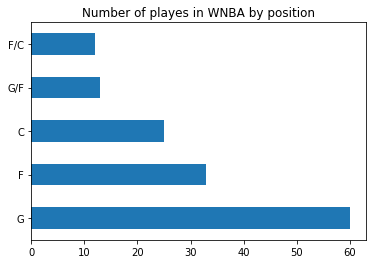

In [47]:
wnba['Pos'].value_counts().plot.barh(title='Number of playes in WNBA by position')

## Pie chart

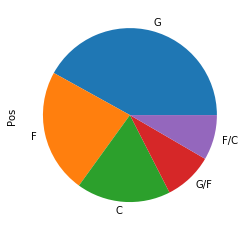

In [48]:
wnba['Pos'].value_counts().plot.pie()

### Remove Y-axis label ('Pos')

Text(0, 0.5, '')

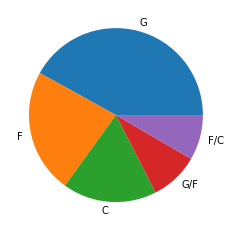

In [49]:
wnba['Pos'].value_counts().plot.pie()
plt.ylabel('')

### Change figure size

Text(0, 0.5, '')

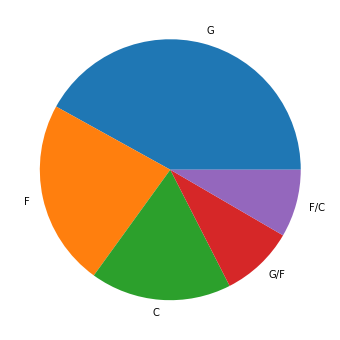

In [50]:
wnba['Pos'].value_counts().plot.pie(figsize=(6,6))
plt.ylabel('')

### Add percentages (utopct='%.1f%%')

Text(0, 0.5, '')

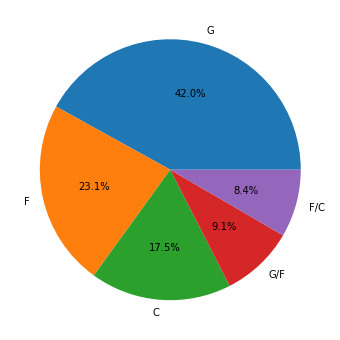

In [51]:
wnba['Pos'].value_counts().plot.pie(figsize=(6,6), autopct='%.1f%%')
plt.ylabel('')

## Histogram

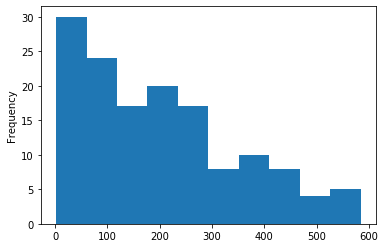

In [52]:
wnba['PTS'].plot.hist()

## Histogram methods

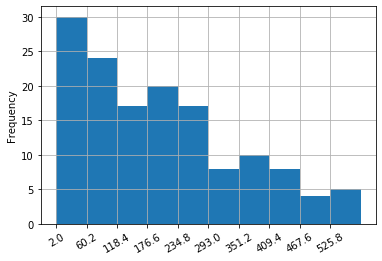

In [53]:
from numpy import arange
wnba['PTS'].plot.hist(grid=True, xticks=arange(2,584,58.2), rot=30)

## Binning for histogram

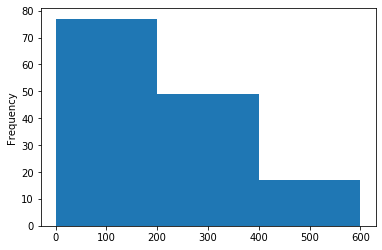

In [54]:
wnba['PTS'].plot.hist(range=(1,600), bins=3)

## Skewed distribution

In a **skewed distribution**:

* The values pile up toward the end or the starting point of the range, making up the body of the distribution.
* Then the values decrease in frequency toward the opposite end, forming the tail of the distribution

* If the tail points to the left, then the distribution is said to be **left skewed**. When it points to the left, the tail points at the same time in the direction of negative numbers, and for this reason the distribution is sometimes also called **negatively skewed**.
* If the tail points to the right, then the distribution is **right skewed**. The distribution is sometimes also said to be **positively skewed** because the tail points in the direction of positive numbers.

AxesSubplot(0.125,0.125;0.775x0.755)


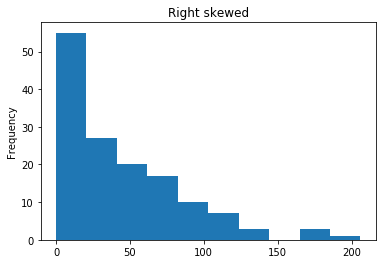

In [55]:
print (wnba['AST'].plot.hist(title='Right skewed')) # Right skewed

AxesSubplot(0.125,0.125;0.775x0.755)


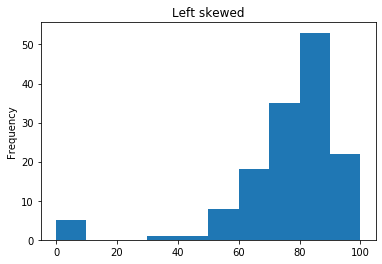

In [56]:
print (wnba['FT%'].plot.hist(title='Left skewed')) # Left skewed

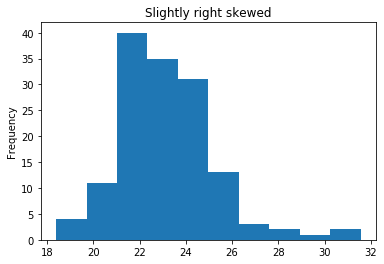

In [57]:
wnba['BMI'].plot.hist(title='Slightly right skewed') # Slightly right skewed

### Normal distribution
If the shape of the histogram is symmetrical, then we say that we have a **symmetrical distribution**.

A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. This pattern is specific to what we call a **normal distribution** (also called **Gaussian distribution**).

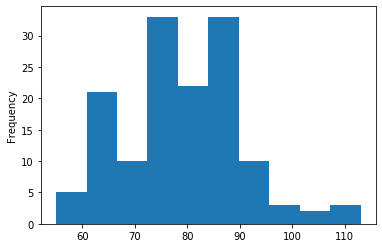

In [58]:
wnba['Weight'].plot.hist() # Normal distribution

### Uniform distribution

Another common symmetrical distribution is one where the values are distributed uniformly across the entire range. This pattern is specific to a **uniform distribution**.

## Grouped bar plots

In [61]:
import seaborn as sns

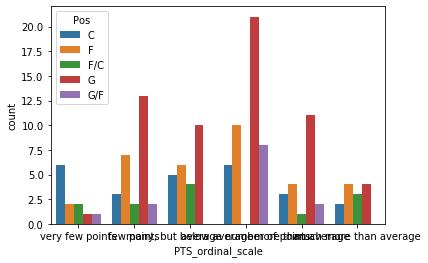

In [72]:
sns.countplot(x='PTS_ordinal_scale', hue='Pos', data=wnba, order=['very few points',
                                                                  'few points',
                                                                  'many, but below average',
                                                                  'average number of points',
                                                                  'more than average',
                                                                  'much more than average'], hue_order=['C',
                                                                                                        'F',
                                                                                                        'F/C',
                                                                                                        'G',
                                                                                                        'G/F'])

# <font color='green'>Do older players play less?</font> 

In [75]:
mean_age = wnba['Age'].mean()
mean_age

27.076923076923077

In [76]:
mean_min = wnba['MIN'].mean()
mean_min

496.97202797202794

In [83]:
wnba['age_ordinal'] = wnba['Age'].apply(lambda x: 'old' if x>=27 else 'young')
wnba['min_ordinal'] = wnba['MIN'].apply(lambda x: 'average or above' if x>=497 else 'below average')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,STL,BLK,TO,PTS,DD2,TD3,Points per game,PTS_ordinal_scale,age_ordinal,min_ordinal
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,3,6,12,93,0,0,11.625000,"many, but below average",young,below average
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,63,13,40,217,0,0,7.233333,average number of points,old,average or above
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,22,3,24,218,0,0,8.384615,average number of points,young,average or above
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,20,10,38,188,2,0,6.064516,average number of points,old,average or above
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,7,0,14,50,0,0,2.083333,few points,young,below average


In [88]:
wnba[['Name','Age','age_ordinal','MIN','min_ordinal']].head()

,Name,Age,age_ordinal,MIN,min_ordinal
0,Aerial Powers,23,young,173,below average
1,Alana Beard,35,old,947,average or above
2,Alex Bentley,26,young,617,average or above
3,Alex Montgomery,28,old,721,average or above
4,Alexis Jones,23,young,137,below average


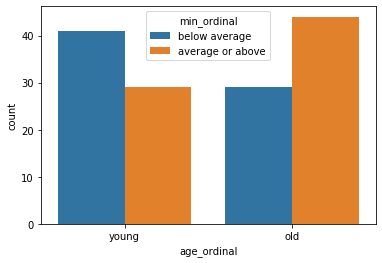

In [89]:
sns.countplot(x='age_ordinal', hue='min_ordinal',data=wnba)

* We can see that more old players belong to the "average or above" category than to "below average", but we can't tell, for instance, whether old players generally play much more than the average. For all we know, they could have all played exactly 497 minutes (which is the average).
* The easiest way to compare two histograms is to superimpose one on top of the other. We can do that by using the pandas visualization methods we learned in the previous mission:

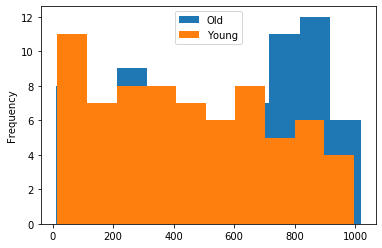

In [90]:
wnba[wnba['Age']>=27]['MIN'].plot.hist(label='Old', legend=True)
wnba[wnba['Age']<27]['MIN'].plot.hist(label='Young', legend=True)

We can now see that most of the old players that belong to the "average or above" category play significantly more than average. The main downside of the visualization above is that the histogram for young players covers a large part of the other histogram. We can fix this easily by plotting only the shape of the histograms. We can do this using the **histtype** parameter and choose the **'step'** type:

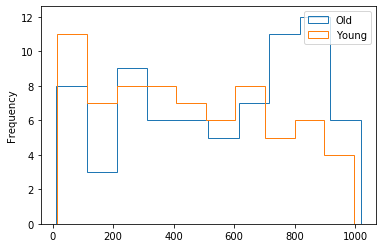

In [92]:
wnba[wnba['Age']>=27]['MIN'].plot.hist(histtype='step', label='Old', legend=True)
wnba[wnba['Age']<27]['MIN'].plot.hist(histtype='step', label='Young', legend=True)

Looking on our graph above, it's not easy to visualize where the average number of minutes is. Using the plt.axvline() function, add a vertical line to demarcate the average point:

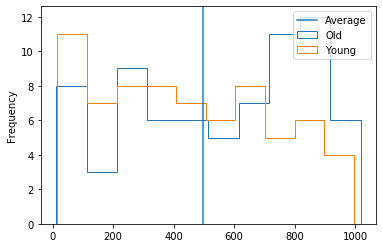

In [94]:
wnba[wnba['Age']>=27]['MIN'].plot.hist(histtype='step', label='Old', legend=True)
wnba[wnba['Age']<27]['MIN'].plot.hist(histtype='step', label='Young', legend=True)
plt.axvline(497, label='Average')
plt.legend()
plt.show()

* The step-type histograms we built made it possible to see clearly both distributions. The graph looked a bit overcrowded though, and the legend was not ideally positioned:
* If we added more histograms to the graph above, it would become highly unreadable, and it'd be difficult to see any clear patterns. One solution to this problem is to smooth out the shape of the histograms to make them look less dense on the graph. This is how a single histogram would look smoothed out:
* We can smooth out our two histograms above for old and young players using the **Series.plot.kde()** function:

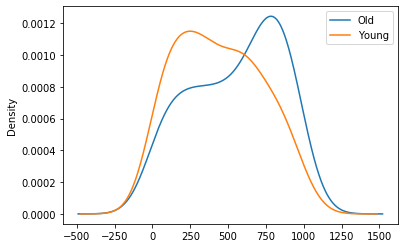

In [96]:
wnba[wnba['Age']>=27]['MIN'].plot.kde(label='Old', legend=True)
wnba[wnba['Age']<27]['MIN'].plot.kde(label='Young', legend=True)

Each of the smoothed histograms above is called a **kernel density estimate plot** or, shorter, kernel density plot. Unlike histograms, kernel density plots display densities on the y-axis instead of frequencies. The density values are actually probability values — which we'll be able to understand more about after the probability courses. All you need to know for now is that we can use kernel density plots to get a much clear picture about the shape of a distribution.

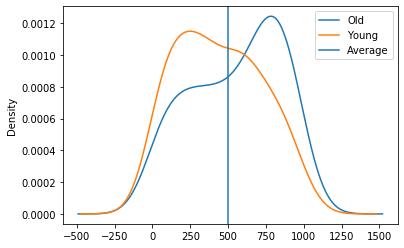

In [97]:
wnba[wnba['Age']>=27]['MIN'].plot.kde(label='Old', legend=True)
wnba[wnba['Age']<27]['MIN'].plot.kde(label='Young', legend=True)
plt.axvline(497, label='Average')
plt.legend()
plt.show()

Grouped bar plots are ideal for variables measured on nominal and ordinal scales. For variables measured on a ratio or interval scale, we learned that kernel density plots are a good solution when we have many distributions to compare. However, kernel density plots tend to become unreadable as we reach five distributions or more.

Let's say we're interested in analyzing the distribution of player height as a function of player position. In other words, we want to figure out, for instance, whether centers are generally taller than forwards, whether forwards are generally shorter than guards, and so on. In the code below, we'll segment the data set by player position, and for each segment we'll generate a kernel density plot for the distribution of the Height variable:

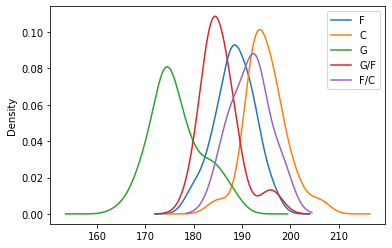

In [98]:
wnba[wnba['Pos']=='F']['Height'].plot.kde(label='F', legend=True)
wnba[wnba['Pos']=='C']['Height'].plot.kde(label='C', legend=True)
wnba[wnba['Pos']=='G']['Height'].plot.kde(label='G', legend=True)
wnba[wnba['Pos']=='G/F']['Height'].plot.kde(label='G/F', legend=True)
wnba[wnba['Pos']=='F/C']['Height'].plot.kde(label='F/C', legend=True)

If we look very closely, we can see a couple of clear patterns: **the shortest players are generally guards, the tallest players are generally centers, mid-height players are generally forwards or play in a combined position**, etc.

Having to look very closely to a graph to identify obvious patterns is far from ideal. If there's any pattern, we want to see it immediately. To overcome this problem, we can use other kinds of graphs, which present the same information in a more readable way